### Read all the images

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
def read_images():
    dir='PIE'
    PIE=os.listdir(dir)
    all_img = []

    img_folders=[dir+'/' + photo for photo in PIE]

    for img_dir in img_folders:
        img_path=os.listdir(img_dir)
        img_dir_index=[img_dir+'/' + photo for photo in img_path]
        all_img.append(img_dir_index)

    flat_list = []
    for sublist in all_img:
        for item in sublist:
            flat_list.append(item)
    
    images = np.array([plt.imread(image) for image in flat_list], dtype=np.int16)
    labels = np.zeros((len(images)))
            
    for i, path in enumerate(flat_list):
        labels[i] = path.split('/')[1]
    return images, labels

In [3]:
images, labels = read_images()
n_samples, image_size, _ = images.shape

### Randomly select 500 images

In [4]:
def select_images(images, labels, select_num):
    num_images = len(images)
    np.random.seed(99)
    rand_images_list = np.random.randint(0, num_images, select_num)
    X = images[rand_images_list].reshape([select_num, image_size*image_size])
    y = labels[rand_images_list]
    return X, y

In [5]:
X, y = select_images(images, labels, 500)

### PCA

In [6]:
def PCA(X):
    mean_data = np.mean(X,axis=0)
    centred_data = X - mean_data
    cov_matrix = np.cov(centred_data.T)
    [eig_val,eig_vec] = np.linalg.eig(cov_matrix)
    projected = np.dot(eig_vec, centred_data.T)
    return eig_val, eig_vec, projected, centred_data

In [7]:
eig_val, eig_vec, projected, centred_data = PCA(X)

### Eigenfaces

In [8]:
def get_eigenface(eig_vec, i):
    return eig_vec[:,i].real.reshape([image_size,image_size])

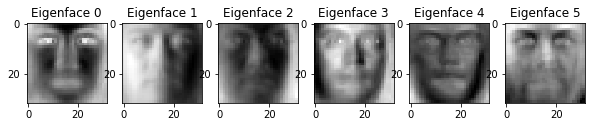

In [9]:
num_eig_faces = 6
fig=plt.figure(figsize=(10, 10))
for i in range(num_eig_faces):
    eig_face = get_eigenface(eig_vec, i)
    ax = fig.add_subplot(1, num_eig_faces, i+1)
    ax.title.set_text('Eigenface '+str(i))
    plt.imshow(eig_face,cmap='gray')
plt.show()

### Visualise 2D and 3D

In [10]:
sorted_eig_index = np.argsort(eig_val)[::-1]

In [11]:
pca_2d_vec = eig_vec[:,sorted_eig_index[0:2]]
pca_3d_vec = eig_vec[:,sorted_eig_index[0:3]]

In [12]:
pca_2d = np.dot(X, pca_2d_vec)
pca_3d = np.dot(X, pca_3d_vec)

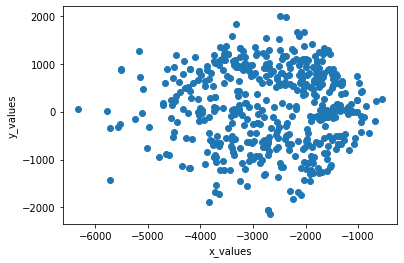

In [13]:
plt.plot(pca_2d[:,0].real, pca_2d[:,1].real, 'o')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

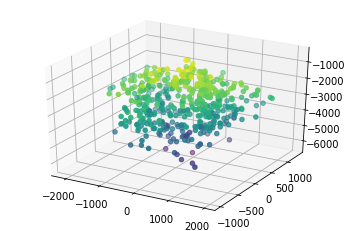

In [14]:
ax = plt.axes(projection='3d')

zdata = pca_3d[:,0].real
xdata = pca_3d[:,1].real
ydata = pca_3d[:,2].real
ax.scatter3D(xdata, ydata, zdata, c=zdata);

### Classifying the test images using the rule of nearest neighbor

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [16]:
def get_reduced_dim_data(eig_vec, X, dim):
    pca_vec = eig_vec[:,0:dim]
    return np.dot(X, pca_vec)

In [17]:
X, y = select_images(images, labels, len(images))

In [18]:
eig_val, eig_vec, projected, centred_data = PCA(X)

In [26]:
dimensions = [40, 80, 200]

In [27]:
for dim in dimensions:
    X_pca = get_reduced_dim_data(eig_vec, centred_data, dim).real
    #split dataset into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = 1)
    # Fit the classifier to the data
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    print(score)

0.9007787712719931
0.9201038361695991
0.9290452841072974
